In [1]:
import pandas as pd # type: ignore

In [3]:
df = pd.read_csv('penjualan_sepatu_1.csv')

In [2]:
# df.describe()

In [5]:
df.head()

,id,name,badges,categoryName,countReview,discountPercentage,sold,originalPrice,price,ratingAverage,shopShopId,shopName,shopCity,shopIsOfficial,shopIsPowerBadge
0,11718663582,Aerostreet 37-44 Brooklyn Putih Putih Abu Muda...,Official Store,Fashion Pria,191,50,5000.0,359800.0,179900.0,4.8,6673471,Aerostreet,Kab. Klaten,True,True
1,7320840825,Sepatu Compass Velocity,Power Merchant Pro Badge,Fashion Pria,95,53,7900.0,1699000.0,798000.0,5.0,7098187,Tijoepass,Jakarta Selatan,False,True
2,1997117378,Sepatu Chef AP CHEF Hitam - Sepatu Dapur Anti ...,Power Merchant Pro Badge,Fashion Pria,387,0,2700.0,0.0,139800.0,4.9,533833,redshroom,Jakarta Barat,False,True
3,2005697120,Sepatu Boots AP MEDIC Putih - Sepatu APD Medis,Power Merchant Pro Badge,Fashion Pria,42,0,4300.0,0.0,215000.0,4.9,533833,redshroom,Jakarta Barat,False,True
4,7033293128,SEPATU SNEAKERS ORTUSEIGHT 100% ORIGINAL HARVA...,Official Store,Fashion Pria,165,15,11100.0,329000.0,279650.0,4.9,4232765,RANK Sports,Serang,True,True


In [4]:
df.shape

(4770, 15)

In [6]:
df.describe()

,id,countReview,discountPercentage,sold,originalPrice,price,ratingAverage,shopShopId
count,4.770000e+03,4770.000000,4770.000000,4770.000000,4.770000e+03,4.770000e+03,4770.000000,4.770000e+03
mean,7.275561e+09,77.572327,13.689099,19286.687631,2.134643e+05,3.749419e+05,3.686876,7.262517e+06
std,4.267359e+09,304.051747,23.546361,51796.624051,5.678486e+05,7.001490e+05,2.109150,5.061013e+06
min,1.928798e+07,0.000000,0.000000,0.000000,0.000000e+00,5.000000e+02,0.000000,2.412000e+03
25%,2.662548e+09,1.000000,0.000000,2100.000000,0.000000e+00,1.050000e+05,4.000000,2.530791e+06
50%,7.555987e+09,5.000000,0.000000,6400.000000,0.000000e+00,1.780000e+05,4.900000,6.673471e+06
75%,1.163588e+10,32.000000,20.000000,16575.000000,2.096250e+05,3.850000e+05,5.000000,1.155957e+07
max,1.297877e+10,8503.000000,99.000000,750000.000000,1.143000e+07,1.500000e+07,5.000000,1.719083e+07


In [13]:
df.shape

(4770, 15)

In [7]:
df.isnull().sum()

id                    0
name                  0
badges                0
categoryName          0
countReview           0
discountPercentage    0
sold                  0
originalPrice         0
price                 0
ratingAverage         0
shopShopId            0
shopName              0
shopCity              0
shopIsOfficial        0
shopIsPowerBadge      0
dtype: int64

In [8]:
list(df.columns)

['id',
 'name',
 'badges',
 'categoryName',
 'countReview',
 'discountPercentage',
 'sold',
 'originalPrice',
 'price',
 'ratingAverage',
 'shopShopId',
 'shopName',
 'shopCity',
 'shopIsOfficial',
 'shopIsPowerBadge']

In [9]:
# rename kolom . 
# df.rename(columns={'shop.shopId': 'shopShopId', 'shop.name': 'shopName', 'shop.city': 'shopCity' , 'shop.isOfficial': 'shopIsOfficial', 'shop.isPowerBadge': 'shopIsPowerBadge'}, inplace=True)

In [10]:
# df.to_csv('data_penjualan_sepatu_tokopedia.csv', index=False)

In [12]:
# Hitung jumlah penjualan per kategori sepatu
jumlah_penjualan_per_kategori = df.groupby("categoryName").size()

#  Urutkan kategori berdasarkan jumlah penjualan
kategori_terpopuler = jumlah_penjualan_per_kategori.sort_values(ascending=False)
# Tampilkan 5 kategori terpopuler
print("Kategori Sepatu Terpopuler:")
print(kategori_terpopuler.head(10))

Kategori Sepatu Terpopuler:
categoryName
Fashion Pria           1747
Fashion Wanita         1255
Fashion Anak & Bayi    1113
Olahraga                653
Dapur                     1
Perlengkapan Pesta        1
dtype: int64


In [11]:
# Hitung rata-rata penjualan sepatu dengan discount dan tanpa diskon
rata_rata_penjualan_diskon = df[df['discountPercentage']> 0]['price'].mean()
rata_rata_penjualan_tanpa_diskon = df[df['discountPercentage'] == 0]['price'].mean()

In [14]:
# Hitung korelasi antara rating dan penjualan
korelasi_rating_penjualan = df["ratingAverage"].corr(df["sold"])

In [15]:
# Tampilkan hasil analisis
print(f"Rata-rata Penjualan Sepatu dengan Diskon: Rp {rata_rata_penjualan_diskon:,.2f}")
print(f"Rata-rata Penjualan Sepatu Tanpa Diskon: Rp {rata_rata_penjualan_tanpa_diskon:,.2f}")
print("Korelasi Rating dan Penjualan:", korelasi_rating_penjualan)

Rata-rata Penjualan Sepatu dengan Diskon: Rp 335,369.72
Rata-rata Penjualan Sepatu Tanpa Diskon: Rp 394,746.66
Korelasi Rating dan Penjualan: 0.07750870916901591


In [16]:
# Menghitung korelasi antara discountPercentage dan jumlah penjualan
korelasi_discount_penjualan = df["discountPercentage"].corr(df["sold"])
print("Korelasi Discount dan Penjualan:", korelasi_discount_penjualan)

Korelasi Discount dan Penjualan: 0.05659095709394247


In [17]:
df["shopCity"] = df["shopCity"].astype("category").cat.codes
korelasi_lokasi_penjualan = df["shopCity"].corr(df["sold"])
print("Korelasi Lokasi Toko dan Penjualan:", korelasi_lokasi_penjualan)


Korelasi Lokasi Toko dan Penjualan: 0.010549873724862633


In [20]:
# Menghitung korelasi antara keberadaan official store (shopIsOfficial) dan jumlah penjualan
korelasi_official_store_penjualan = df["shopIsOfficial"].astype(int).corr(df["sold"])
print("Korelasi Official Store dan Penjualan:", korelasi_official_store_penjualan)


Korelasi Official Store dan Penjualan: 0.09851319795989803


In [19]:
# Menghitung korelasi antara harga dan jumlah penjualan
korelasi_harga_penjualan = df["price"].corr(df["sold"])
print("Korelasi Harga dan Penjualan:", korelasi_harga_penjualan)


Korelasi Harga dan Penjualan: 0.14537407441493713


In [18]:
# Melakukan analisis frekuensi antara nama produk dan jumlah penjualan
frequency_analysis = df.groupby('name')['sold'].sum()
frequency_analysis.head()



name
Anti -Slip and Breathable Pria Sepatu Kuning Sepatu Hitam B41/42        3100.0
Eagle Sepatu Sneakers Lifestyle Oregon - Lifestyle Sneakers Shoes      37600.0
SEPATU SNEAKER PRIA IMPORT - KASUAL MEN‘S SPORT FASHION 2023“CZ012”        0.0
SEPATU SNEAKER PRIA IMPORT - KASUAL MEN‘S SPORT FASHION 2023“CZ025”        0.0
Sepatu ASICS Men Japan S Grey 1201A173.021                             48300.0
Name: sold, dtype: float64

In [21]:
# Menampilkan 10 produk dengan jumlah penjualan tertinggi
top_products = df.nlargest(10, 'sold')
top_products.tail()

,id,name,badges,categoryName,countReview,discountPercentage,sold,originalPrice,price,ratingAverage,shopShopId,shopName,shopCity,shopIsOfficial,shopIsPowerBadge
4278,1052293623,sepatu sekolah anak perempuan dan laki-laki sl...,Power Merchant Pro Badge,Fashion Anak & Bayi,471,0,750000.0,0.0,24900.0,4.8,2966214,lollita shoes,19,False,True
4447,1161863776,Kaos kaki bayi anak perempuan ada anti slip mo...,Power Merchant Pro Badge,Fashion Anak & Bayi,217,2,750000.0,7992.0,7800.0,4.9,889676,BABYKU WHOLESALER,51,False,True
299,1935554575,SEPATU PDL TNI SEPATU PDL POLRI TACTICAL JATAH...,Power Merchant Pro Badge,Fashion Pria,166,0,500000.0,0.0,99500.0,4.5,7547370,D'bobs hanmade original,14,False,True
499,7733641946,Aerostreet 37-44 Massive Low Gum Navy Denim - ...,Official Store,Fashion Pria,308,56,500000.0,319800.0,142197.0,4.9,6673471,Aerostreet,30,True,True
515,1518294556,Sepatu Pantofel Karet Merk Sankyo SAF 1120 - H...,Power Merchant Pro Badge,Fashion Pria,229,0,500000.0,0.0,28000.0,4.9,2011641,Putra Utama Manunggal,3,False,True


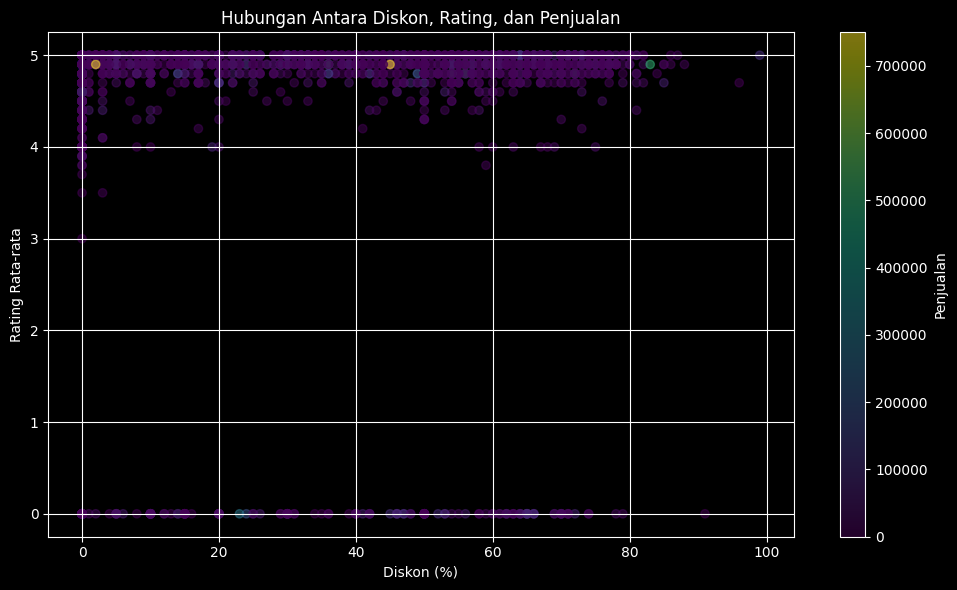

Korelasi antara Penjualan dan Diskon: 0.05659095709394247
Korelasi antara Penjualan dan Rating: 0.0775087091690159


In [22]:
import matplotlib.pyplot as plt

# Menghitung korelasi antara penjualan dan diskon
korelasi_penjualan_diskon = df["sold"].corr(df["discountPercentage"])

# Menghitung korelasi antara penjualan dan rating
korelasi_penjualan_rating = df["sold"].corr(df["ratingAverage"])

# Membuat scatter plot untuk memvisualisasikan hubungan antara diskon, rating, dan penjualan
plt.figure(figsize=(10, 6))
plt.scatter(df["discountPercentage"], df["ratingAverage"], c=df["sold"], cmap='viridis', alpha=0.5)
plt.colorbar(label='Penjualan')
plt.xlabel('Diskon (%)')
plt.ylabel('Rating Rata-rata')
plt.title('Hubungan Antara Diskon, Rating, dan Penjualan')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Korelasi antara Penjualan dan Diskon:", korelasi_penjualan_diskon)
print("Korelasi antara Penjualan dan Rating:", korelasi_penjualan_rating)


In [23]:
!pip3 install pillow

Defaulting to user installation because normal site-packages is not writeable
